In [1]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
import scipy.io as sio
import tools.graph_processing as gp
import scipy.stats as stats
import math

In [2]:
path_to_labelled_graphs = '../data/Oasis_original_new_with_dummy/labelled_graphs'
path_ro_correspondence = 'gender_correspondence.pickle'

In [3]:
def create_clusters_lists_with_label_gender(list_graphs,gender_corresp,label_attribute="label_dbscan"):

    result_dict = {}
    label_depths = {}
    label_gender = {}

    for i_graph, graph in enumerate(list_graphs):
        for node in graph.nodes:
            if not graph.nodes[node]["is_dummy"]:
                label_cluster = graph.nodes[node][label_attribute]
                
                if label_cluster in result_dict:
                    
                    #retrieve depth of the corresponding label in that graph
                    depth_value = graph.nodes[node]['depth']
                    
                    result_dict[label_cluster].append((i_graph, node))
                    label_depths[label_cluster].append(depth_value)
                    label_gender[label_cluster].append(gender_corresp[i_graph])
                    
                else:
                    #retrieve depth of the corresponding label in that graph
                    depth_value = graph.nodes[node]['depth']
                    
                    result_dict[label_cluster] = [(i_graph, node)]
                    label_depths[label_cluster] = [depth_value]
                    label_gender[label_cluster] = [gender_corresp[i_graph]]


    return result_dict,label_depths,label_gender

In [4]:
labeled_graphs = gp.load_graphs_in_list(path_to_labelled_graphs)
gender_corresp = np.array(nx.read_gpickle(path_ro_correspondence))[:,2]# gender correp list

In [5]:
def seperate_groups_by_label(label_gender,label_depths):
    
    # Separate groups by label
    
    label_gen_sep = []
    for key in label_gender.keys():
        M = []
        F = []
        for i in range(len(label_gender[key])):

            if label_gender[key][i] == 'F':

                F.append(label_depths[key][i])
            else:
                M.append(label_depths[key][i])
                
         # 1st list M, 2nd F
        
        label_gen_sep.append([M,F])
        
    return label_gen_sep
    

In [17]:
def calculate_tstats_and_pvalues(corresp ,method = 'labelling_mALS'):
    
    # get labeled groups and depths    
    result_dict,label_depths,label_gender = create_clusters_lists_with_label_gender(labeled_graphs,corresp,method)
    
    # depth seperated by groups
    label_gen_sep = seperate_groups_by_label(label_gender,label_depths)
    
    t_stats = {}

    for key,lst in zip(label_gender.keys(),label_gen_sep):

        res = stats.ttest_ind(a=lst[0], b=lst[1], equal_var=True)

        t_stats[key] = [res[0],res[1]]
        
    return t_stats,label_gen_sep

In [18]:
# calculate_tstats_and_pvalues(gender_corresp, 'labelling_mSync')

In [19]:
# calculate_tstats_and_pvalues(gender_corresp, 'labelling_MatchEig')

In [20]:
t_stats,label_gen_sep = calculate_tstats_and_pvalues(gender_corresp, 'labelling_mALS')

In [9]:
# result_dict,label_depths,label_gender = create_clusters_lists_with_label_gender(labeled_graphs,gender_corresp,'labelling_mALS')

Text(0.5, 0, 'Blue Male / Orange Female (t-value:1.4427523855949944)')

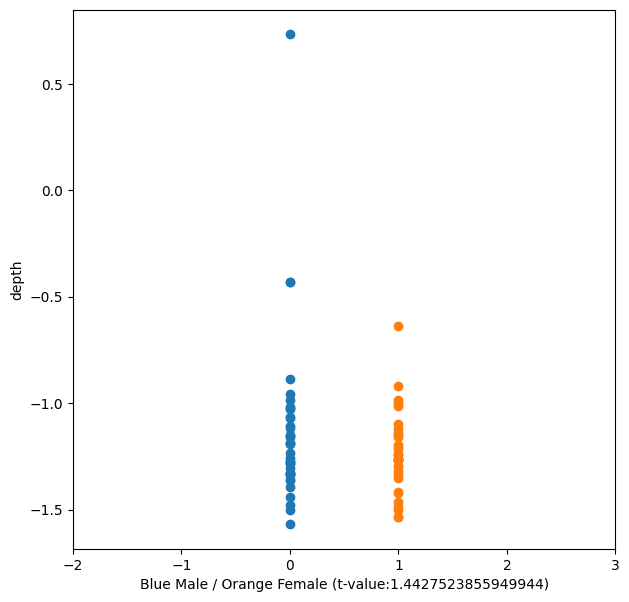

In [107]:
fig = plt.figure(figsize=(7, 7))

label = 41

Males = label_gen_sep[label][0] 
Females = label_gen_sep[label][1]

x0 = np.zeros(len(Males))
x1 = np.ones(len(Females))

t_stat_values =  list(t_stats.values())

plt.scatter(x0,Males) # M
plt.scatter(x1, Females)  # F
plt.xticks(np.arange(-2, 4, 1.0))

plt.ylabel('depth')
plt.xlabel('Blue Male / Orange Female (t-value:'+ str(t_stat_values[label][0])+ ')')

In [87]:
t_stats

{0.6726961301647116: [-0.9393205500309549, 0.35281295936829393],
 0.3119287115852154: [-1.44107245676289, 0.15378245368357538],
 -0.1: [-1.7981280518084264, 0.07224421166239267],
 0.8893209701421761: [-1.7039740411943542, 0.09236691937837412],
 0.055688767098739926: [0.558259915184414, 0.5776345606562069],
 0.6164804022678066: [0.6588713130945588, 0.5113187568232636],
 0.5614567581322376: [-0.7126778979108633, 0.47758203659844667],
 0.7943269487351451: [0.9360865602275951, 0.3515533307185369],
 0.48756164187770873: [-1.1160933933987816, 0.267682220926069],
 0.8123777065116572: [-0.5689294812347238, 0.5704087589139389],
 0.676948807071108: [1.2390929376625963, 0.21969951429831175],
 0.879479847512742: [0.5872884821216837, 0.5580693016068246],
 0.5376379964782969: [-1.363298686457699, 0.17509175858469317],
 0.28967332925889594: [0.3514605529101189, 0.7258118561264489],
 0.956799027313698: [1.117657239640099, 0.26594602871587897],
 0.5231860053967116: [0.8506075203708285, 0.39652773410851

In [15]:
# def drop_nan(t_stat_dict):
    
#     drop_k = []
#     for k in t_stat_dict.keys():
#         if math.isnan(t_stat_dict[k][0]):
#             drop_k.append(k)

#     for k in drop_k:
#         t_stat_dict.pop(k)
    
#     return np.array(list(t_stat_dict.values()))